# Clustering Case Study

Dengan data MALL CUSTOMER, kita akan melakukan clustering terkait dengan eksplorasi pola pelanggan terhadapan beberapa fitur shg dapat di cluster kan ke segmen-segmen dg karakteristik masing-masing

# Import Library

1. pandas untuk baca data
2. matplotlib untuk visualisasi data
3. KElbowVisualizer untuk visualisasi Elbow
4. scikit-learn untuk model dan metrics evaluasi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Data Loading

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Padadataset bisa kita dapatkan 5 feature yakni

1. ID
2. Gender
3. Age
4. Pendapatan tahunan
5. skor pengeluaran dalam range 1-100

**MENAMPILKAN INFO DARI DATASET**

Selanjutnya adalah menampilkan beberapa info dataset untuk mengetahui apakah ada data yang kosong atau tidak (missing values checking)

Selain itu juga untuk mengetahui type data masing-masing feature

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Dataset tidak memiliki missing values dan mempunyai 4 integer, 1 object

**Tampilkan STATISTIK DESKRIPTIF**

sebagai ringkasan statistik untuk kolom numerik, ini bantu pahami distribusi data dan kemungkinan adanya outlier atau anomali

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Exploratory Data Analysis

1. Pahami pola
2. Relasi dalam data
3. Indikasi anomali (outliers)

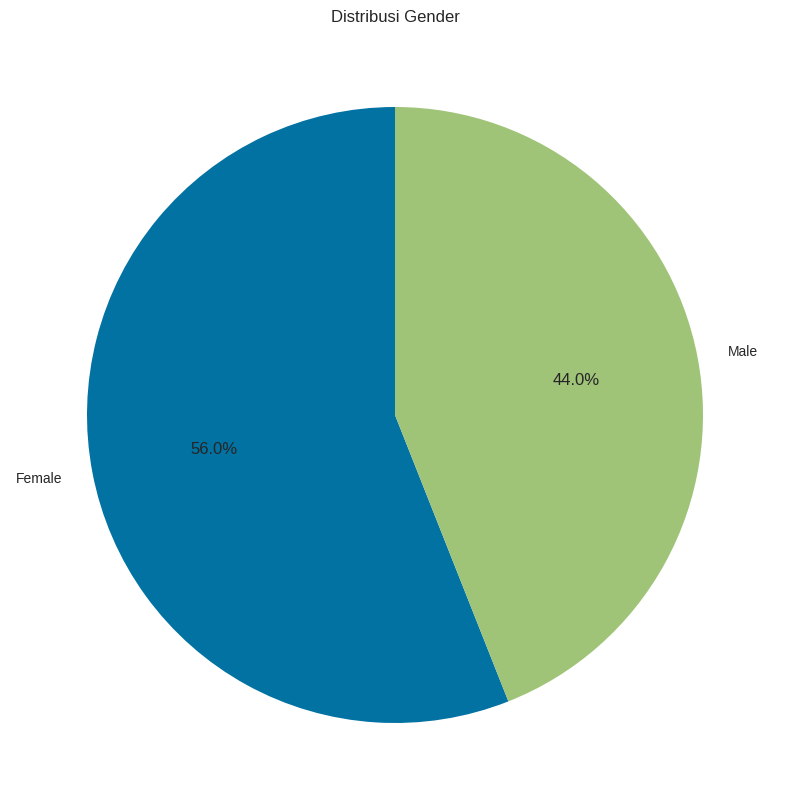

In [5]:
# Hitung distribusi gender dan menampilkan pie chart untuk visualisuasi

plt.figure(figsize=(10,10))
plt.pie(df['Gender'].value_counts(), labels=['Female','Male'], autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Gender')
plt.show()

Ternyata pelanggan perempuan > pelanggan pria

**Analisis Usia Pelanggan**

Disini kita akan melakukan **binning**.
Dimana akan mengelompokkan usia dalam 5 kategori(bins). Lalu kita visualkan dalam bentuk diagram batang (barchart)


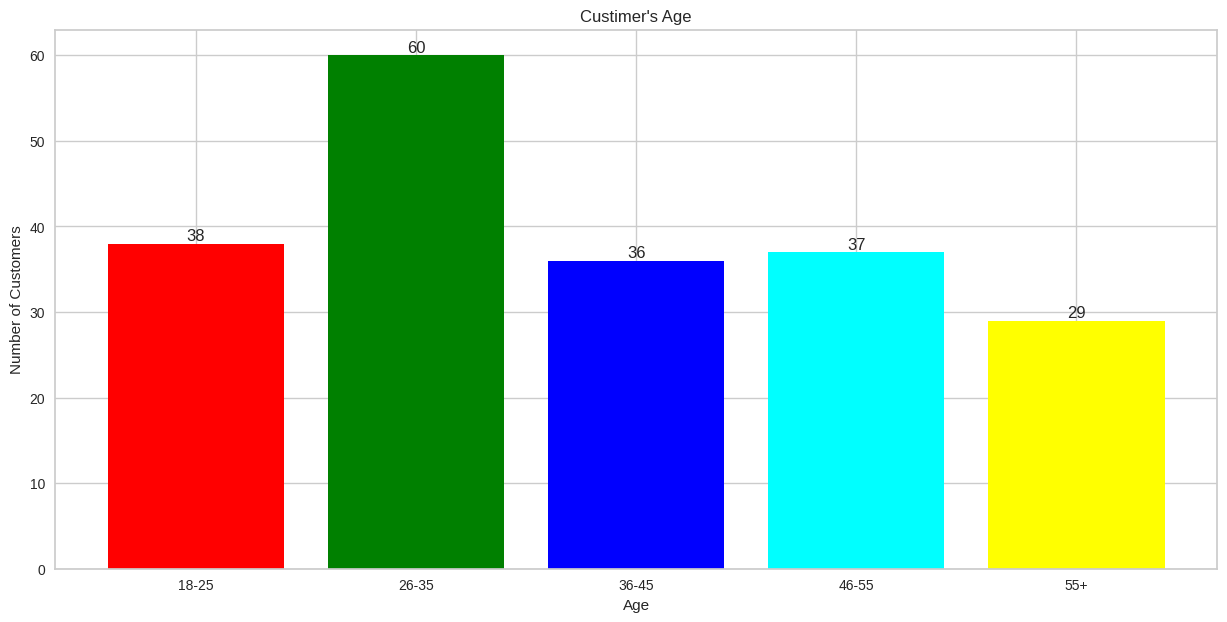

In [ ]:
# Kelompokkan data

age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age55above = df.Age[df.Age >= 56]

# Susun data untuk Plotting
ax = ['18-25', '26-35', '36-45', '46-55', '55+']
ay = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

# Membuat bar chart visualisasi
plt.figure(figsize=(15,7))
plt.bar(ax, ay, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Custimer's Age")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

# Tambahkan label pelanggan di atas every bar
for i in range(len(x)) :
  plt.text(i, ay[i], ay[i], ha='center', va='bottom')

plt.show()

**ANALISIS PENGHASILAN TAHUNAN PELANGGAN**

Dengan cara yang sama seperti saat analisis usia, kita akan membagi data penghasilan menjadi 5 rentang kelompok. Hal ini agar lebih mudah dianalisa

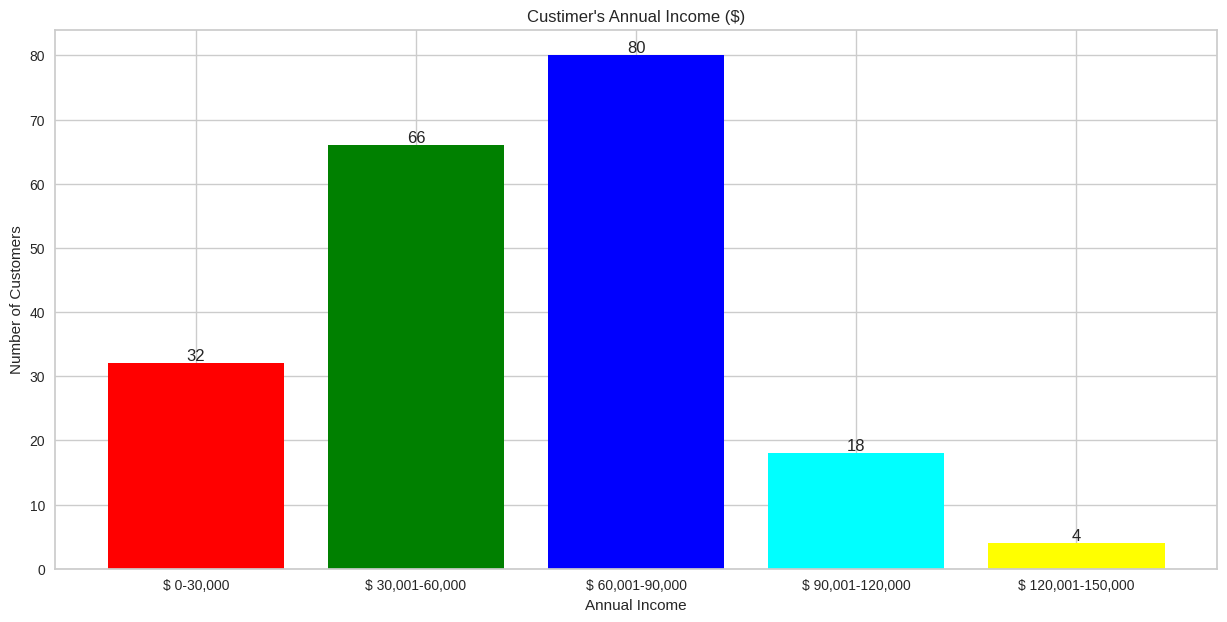

In [ ]:
# Kelompokkan data penghasilan tahunan
income0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 30)]
income31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31) & (df['Annual Income (k$)'] <= 60)]
income61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61) & (df['Annual Income (k$)'] <= 90)]
income91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 91) & (df['Annual Income (k$)'] <= 120)]
income121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 121) & (df['Annual Income (k$)'] <= 150)]

# Berikan label dan susun data
aix = ['$ 0-30,000', '$ 30,001-60,000', '$ 60,001-90,000', '$ 90,001-120,000', '$ 120,001-150,000']
aiy = [len(income0_30), len(income31_60), len(income61_90), len(income91_120), len(income121_150)]

# Buat plot
# Membuat bar chart visualisasi
plt.figure(figsize=(15,7))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Custimer's Annual Income ($)")
plt.xlabel("Annual Income")
plt.ylabel("Number of Customers")

# Tambahkan label pelanggan di atas every bar
for i in range(len(aix)) :
  plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')

plt.show()

# Data Splitting

1. Mengambil dua kolom dari data yakni Annual Income dan Spending Score (1-100)
2. Memasukkan kedua kolom ke dalam array X untuk analisis lanjut
3. Ambil data dari format DataFrame sesuai nama kolom.

Tujuan : agar kita bisa melihat nilai pendapatan tahunan dan skor yang pelanggan keluarkan dengan cara yang lebih mudah dibaca

In [9]:
# Ambil kolom 'Annual' dan 'Spending'
X = df.iloc[:, [3,4]].values

# makna dari kode di atas:
# Dari data df - ambil data berdasarkan baris dan kolom(not name) - : (all row), kolom 3 4 - ambil nilainya saja dan masukkan ke array X

# Tampilkan
print(pd.DataFrame(X, columns=['Annual Income(k$)', 'Spending Score (1-100)']))

     Annual Income(k$)  Spending Score (1-100)
0                   15                      39
1                   15                      81
2                   16                       6
3                   16                      77
4                   17                      40
..                 ...                     ...
195                120                      79
196                126                      28
197                126                      74
198                137                      18
199                137                      83

[200 rows x 2 columns]


Setelah ini kita akan melakukan cluster berdasarkan usia pendapatan tahunan dan skor pengeluaran mereka

# Elbow Method

Disini kita akan gunakan Elbow Method dbg CENAYANG untuk prediksi brp K yang baik untuk cluster

Hal ini guna menghindari overfitting. Kita akan pakai hasil brp (K) td.

Elbow Method akan bisa dibaca menggunakan grafik WCSS

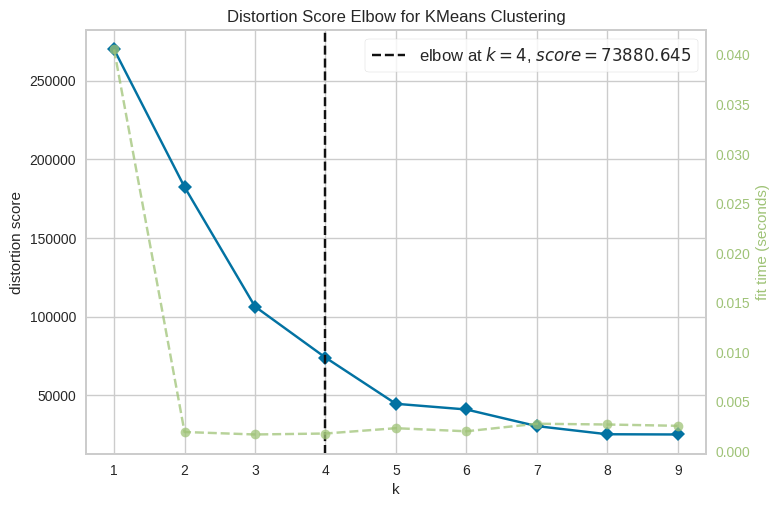

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk tentukan jmlh K
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# fit visualizer dg data untuk temukan jml cluster yg baik (ambil dari array X)
visualizer.fit(X)

# show up
visualizer.show()


K = 4

adalah jumlah cluster yang disarankan agar terhindar dari overfitting

# Clustering K-Means

1. parameter n_clusters = 4
2. random_state = 0
3. Tujuan akhirnya adalah untuk mendapatkan wawasan terkait profil dari customers

In [11]:
from sklearn.cluster import KMeans

# Inisialisasi dan latih model KMeans dg cluster = 4 dg data yang sudah disiapkan (X)
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# dapatkan label cluster
labels = kmeans.labels_

# jumlah cluster
k = 4

# buat func untuk analisis karakteristik cluster
def analis(X, labels, k):
  print("Analisis ciri setiap Cluster: ")
  for cluster_id in range(k):
    # ambil data cluster
    cluster_data = X[labels == cluster_id]

    # hitung rata-rata setiap fitur dalam cluster
    mean_income = cluster_data[:, 0].mean()
    mean_spend = cluster_data[:, 1].mean()

    print(f"\nCluster {cluster_id + 1:}")
    print(f"Mean Anual Income (k$) : {mean_income:.2f}")
    print(f"Mean Spending Score (1-100) : {mean_spend:.2f}")

# analisis setiap cluster
analis(X, labels, k)

Analisis ciri setiap Cluster: 

Cluster 1
Mean Anual Income (k$) : 48.26
Mean Spending Score (1-100) : 56.48

Cluster 2
Mean Anual Income (k$) : 86.54
Mean Spending Score (1-100) : 82.13

Cluster 3
Mean Anual Income (k$) : 87.00
Mean Spending Score (1-100) : 18.63

Cluster 4
Mean Anual Income (k$) : 26.30
Mean Spending Score (1-100) : 20.91


**LAKUKAN VISUALISASI**

1. visualisasi dalam diagram
2. setiap cluster punya center (centroid) dg 'cluster_centers_'
3. dimulai dg plot scatter data yg sudah di cluster
4. dan menambahkan centroid

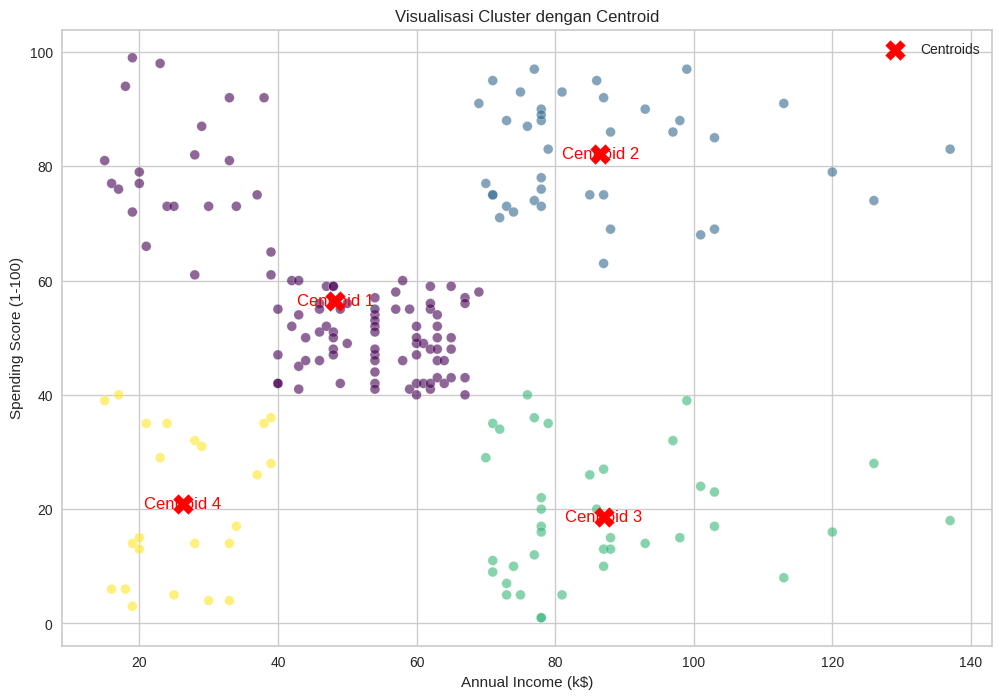

Nilai Centroids:
Centroid 1: Annual Income = 48.26, Spending Score = 56.48
Centroid 2: Annual Income = 86.54, Spending Score = 82.13
Centroid 3: Annual Income = 87.00, Spending Score = 18.63
Centroid 4: Annual Income = 26.30, Spending Score = 20.91


In [13]:
import matplotlib.pyplot as plt

# tentukan pcc centroid
centroids_pcc = kmeans.cluster_centers_

# visualisasi cluster
plt.figure(figsize=(12,8))

# plot data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# plot centroid
plt.scatter(centroids_pcc[:, 0], centroids_pcc[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids_pcc):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids_pcc):
    print(f"Centroid {i+1}: Annual Income = {centroid[0]:.2f}, Spending Score = {centroid[1]:.2f}")